In [24]:
# --- FASE 1: EXTRACCIÓN DE DATOS DESDE LA API ---

# 1. Importación de Librerías
# Importamos Pandas, la librería esencial para todo el manejo de datos en Python.
import pandas as pd

# 2. Definición de la Fuente de Datos
# La información de nuestros clientes se encuentra en un archivo JSON alojado en GitHub.
# Esta URL apunta directamente al contenido crudo del archivo.
url_datos_clientes = "https://github.com/ingridcristh/challenge2-data-science-LATAM/raw/refs/heads/main/TelecomX_Data.json"

# 3. Carga de Datos
# Usamos la función pd.read_json() para leer los datos desde la URL y cargarlos en un DataFrame.
datos_originales = pd.read_json(url_datos_clientes)

# 4. Verificación Inicial
# Es una buena práctica visualizar las primeras filas para confirmar que la carga fue exitosa
# y para tener una primera idea de la estructura de los datos.
print("--- Datos crudos cargados exitosamente. Vista previa: ---")
display(datos_originales.head())

--- Datos crudos cargados exitosamente. Vista previa: ---


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# FASE 2: Transformación y Limpieza de Datos

In [25]:
# --- Paso 2.1: Normalización de Datos Anidados ---

# Los datos en las columnas 'customer', 'phone', etc., son diccionarios.
# Usaremos la potente función pd.json_normalize() para expandir estos diccionarios en sus propias columnas.

# Convertimos el DataFrame a una lista de diccionarios, que es el formato que la función necesita.
registros_json = datos_originales.to_dict('records')

# Aplicamos la normalización. Pandas se encargará de aplanar todas las columnas anidadas.
datos_aplanados = pd.json_normalize(registros_json)

# Verificamos el resultado. La tabla ahora será mucho más ancha y todas las columnas estarán a la vista.
print("--- Datos aplanados y normalizados con éxito. Vista previa: ---")
display(datos_aplanados.head())

--- Datos aplanados y normalizados con éxito. Vista previa: ---


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [26]:
# --- Paso 2.2: Diagnóstico Inicial de los Datos ---

# 1. Información General: Verificamos los tipos de datos (Dtype) y el conteo de valores no nulos.
print("--- 1. Información General del DataFrame Aplanado ---")
datos_aplanados.info()

print("\n" + "="*60 + "\n") # Separador para mayor claridad

# 2. Conteo de Valores Nulos: Hacemos un conteo explícito de datos faltantes por columna.
print("--- 2. Conteo de Valores Nulos (Datos Faltantes) por Columna ---")
print(datos_aplanados.isnull().sum())

--- 1. Información General del DataFrame Aplanado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 

In [27]:
# --- Paso 2.3: Corrección de Tipos de Datos ---

# 1. Convertir la columna 'account.Charges.Total' a un formato numérico.
# Usamos 'errors=coerce' para que cualquier valor que no se pueda convertir (como un espacio en blanco)
# se transforme automáticamente en un valor Nulo (NaN).
datos_aplanados['account.Charges.Total'] = pd.to_numeric(datos_aplanados['account.Charges.Total'], errors='coerce')

# 2. Verificar si la conversión creó nuevos valores nulos.
# Esto nos dirá cuántas filas tenían datos no numéricos.
print("--- Conteo de Nulos DESPUÉS de la conversión ---")
print(datos_aplanados.isnull().sum())

# 3. Eliminar las filas con valores nulos en 'account.Charges.Total'.
# Como el cargo total es vital para el análisis, las filas sin este dato no son útiles.
# 'inplace=True' aplica el cambio directamente sobre nuestro DataFrame.
datos_aplanados.dropna(subset=['account.Charges.Total'], inplace=True)

# 4. Verificación Final
# Usamos .info() de nuevo para confirmar que la columna ahora es de tipo float64
# y que ya no hay valores nulos en ninguna parte.
print("\n--- Verificación Final del DataFrame ---")
datos_aplanados.info()

--- Conteo de Nulos DESPUÉS de la conversión ---
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64

--- Verificación Final del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   custo

In [28]:
# --- Paso 2.4: Verificación de Consistencia en Datos Categóricos ---

# Seleccionamos todas las columnas de tipo 'object' (texto)
columnas_de_texto = datos_aplanados.select_dtypes(include=['object']).columns

# Usamos un bucle para revisar cada columna y mostrar sus valores únicos.
for columna in columnas_de_texto:
  print(f"--- Valores Únicos en la Columna: {columna} ---")
  print(datos_aplanados[columna].unique())
  print("\n" + "="*50 + "\n")

--- Valores Únicos en la Columna: customerID ---
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


--- Valores Únicos en la Columna: Churn ---
['No' 'Yes' '']


--- Valores Únicos en la Columna: customer.gender ---
['Female' 'Male']


--- Valores Únicos en la Columna: customer.Partner ---
['Yes' 'No']


--- Valores Únicos en la Columna: customer.Dependents ---
['Yes' 'No']


--- Valores Únicos en la Columna: phone.PhoneService ---
['Yes' 'No']


--- Valores Únicos en la Columna: phone.MultipleLines ---
['No' 'Yes' 'No phone service']


--- Valores Únicos en la Columna: internet.InternetService ---
['DSL' 'Fiber optic' 'No']


--- Valores Únicos en la Columna: internet.OnlineSecurity ---
['No' 'Yes' 'No internet service']


--- Valores Únicos en la Columna: internet.OnlineBackup ---
['Yes' 'No' 'No internet service']


--- Valores Únicos en la Columna: internet.DeviceProtection ---
['No' 'Yes' 'No internet service']


--- Valores Únicos en la Columna

In [29]:
# --- Paso 2.5: Limpieza Final y Estandarización de Texto ---

# 1. Aplicamos .str.strip() para eliminar cualquier espacio en blanco al inicio o final
# de los strings en todas las columnas de texto. Es una práctica de limpieza profesional.
for columna in datos_aplanados.select_dtypes(include=['object']).columns:
  datos_aplanados[columna] = datos_aplanados[columna].str.strip()

# 2. Ahora que los espacios en blanco se han convertido en strings vacíos (''),
# filtramos el DataFrame para mantener solo las filas donde 'Churn' no es un string vacío.
datos_limpios = datos_aplanados[datos_aplanados['Churn'] != ''].copy()

# 3. Verificación Final: Comprobamos los valores únicos de 'Churn' y las dimensiones finales.
print("--- Verificación de la columna 'Churn' después de la limpieza ---")
print(datos_limpios['Churn'].unique())

print(f"\nDimensiones finales del DataFrame limpio: {datos_limpios.shape}")

--- Verificación de la columna 'Churn' después de la limpieza ---
['No' 'Yes']

Dimensiones finales del DataFrame limpio: (7032, 21)


In [30]:
# --- Paso 2.6: Enriquecimiento de Datos (Feature Engineering) ---

# 1. Crear la columna de 'Cargos Diarios' a partir de los cargos totales y la antigüedad.
# Asumimos 30 días por mes para el cálculo.
datos_limpios['customer.Charges.Daily'] = datos_limpios['account.Charges.Total'] / (datos_limpios['customer.tenure'] * 30)

# 2. Manejar la división por cero: si la antigüedad (tenure) es 0, el resultado es infinito (inf).
# Reemplazamos estos valores infinitos por 0 para mantener la consistencia numérica.
datos_limpios.replace([float('inf'), float('-inf')], 0, inplace=True)

# 3. Verificación Final: Mostramos las primeras filas para confirmar que la nueva columna fue creada.
print("--- DataFrame Enriquecido con la Nueva Columna 'Cargos Diarios' ---")
display(datos_limpios.head())

# Verificamos las nuevas dimensiones (ahora deberíamos tener 22 columnas)
print(f"\nDimensiones finales del DataFrame Enriquecido: {datos_limpios.shape}")

--- DataFrame Enriquecido con la Nueva Columna 'Cargos Diarios' ---


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,customer.Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.971111



Dimensiones finales del DataFrame Enriquecido: (7032, 22)


# FASE 3: Análisis Exploratorio de Datos (EDA) ---

/tmp/ipython-input-2945322847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=datos_limpios, palette='viridis')


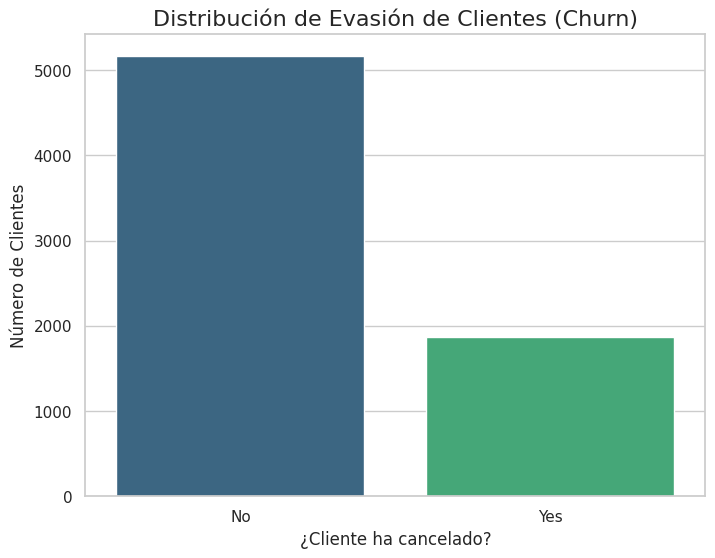


--- Conteo y Porcentaje de Churn ---
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Tasa de Churn ('Yes'): 26.58%
Tasa de Retención ('No'): 73.42%


In [31]:
# --- Paso 3.1: Visualización de la Distribución de Churn ---

# Importamos las librerías de visualización (Matplotlib y Seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo de los gráficos para una presentación profesional
sns.set(style="whitegrid")

# 1. Creación del Gráfico de Barras (Countplot)
plt.figure(figsize=(8, 6))
# Usamos 'Churn' en el eje X para contar las ocurrencias de 'No' y 'Yes'
ax = sns.countplot(x='Churn', data=datos_limpios, palette='viridis')

# 2. Añadimos Títulos y Etiquetas
ax.set_title('Distribución de Evasión de Clientes (Churn)', fontsize=16)
ax.set_xlabel('¿Cliente ha cancelado?', fontsize=12)
ax.set_ylabel('Número de Clientes', fontsize=12)

# 3. Mostramos el gráfico
plt.show()

# 4. Calculamos e imprimimos la tasa de Churn (para el informe final)
print("\n--- Conteo y Porcentaje de Churn ---")
# .value_counts(normalize=True) nos da la proporción
proporcion_churn = datos_limpios['Churn'].value_counts(normalize=True) * 100
print(datos_limpios['Churn'].value_counts())
print(f"\nTasa de Churn ('Yes'): {proporcion_churn['Yes']:.2f}%")
print(f"Tasa de Retención ('No'): {proporcion_churn['No']:.2f}%")

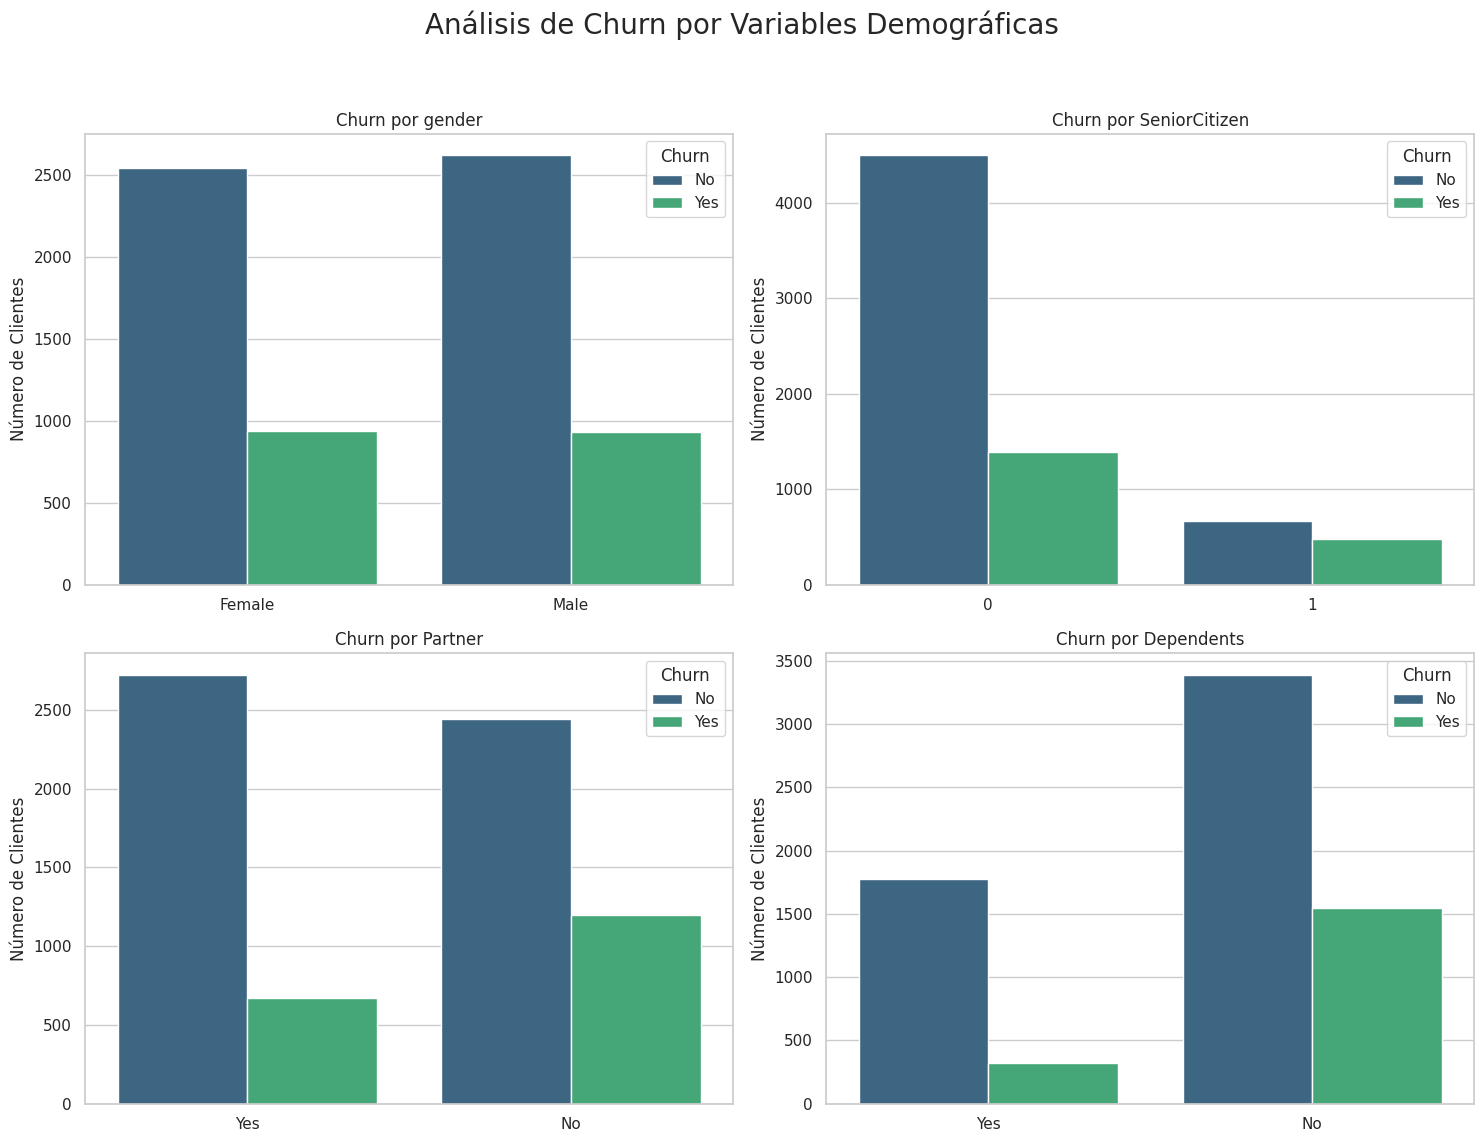

In [32]:
# --- Paso 3.2: Análisis de Churn por Perfil Demográfico ---

# Lista de las columnas demográficas que vamos a analizar
variables_demograficas = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents']

# Creamos una figura grande para agrupar los 4 gráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Análisis de Churn por Variables Demográficas', fontsize=20)

# Usamos un bucle para crear un gráfico para cada variable de la lista
for i, columna in enumerate(variables_demograficas):
    ax = axes.flatten()[i] # Seleccionamos el subgráfico correspondiente
    # Usamos 'hue="Churn"' para que Seaborn cree barras separadas para 'Yes' y 'No'
    sns.countplot(x=columna, hue='Churn', data=datos_limpios, ax=ax, palette='viridis')
    ax.set_title(f'Churn por {columna.split(".")[-1]}') # Título dinámico
    ax.set_xlabel('') # Limpiamos la etiqueta X para mayor claridad
    ax.set_ylabel('Número de Clientes')

# Ajustamos el espaciado y mostramos la figura completa
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

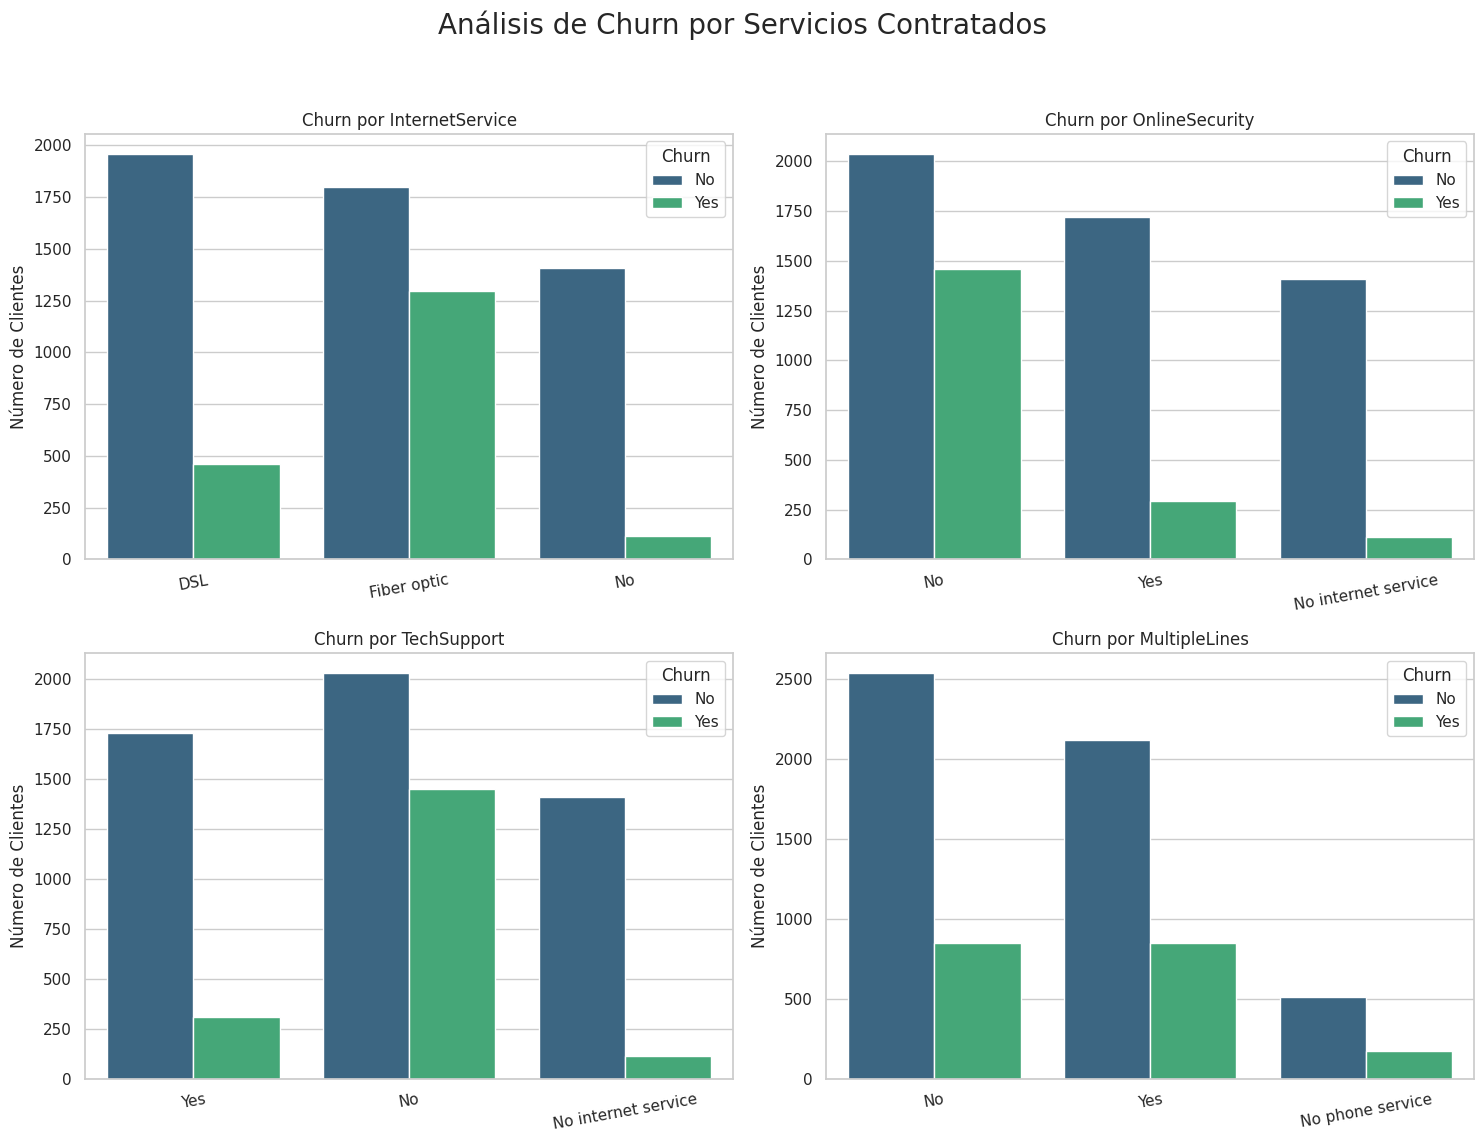

In [33]:
# --- Paso 3.3: Análisis de Churn por Servicios Contratados ---

# Lista de columnas clave relacionadas con los servicios
variables_servicios = ['internet.InternetService', 'internet.OnlineSecurity', 'internet.TechSupport', 'phone.MultipleLines']

# Creamos una nueva figura para este segundo dashboard
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Análisis de Churn por Servicios Contratados', fontsize=20)

# Bucle para generar un gráfico por cada servicio
for i, columna in enumerate(variables_servicios):
    ax = axes.flatten()[i]
    sns.countplot(x=columna, hue='Churn', data=datos_limpios, ax=ax, palette='viridis')
    ax.set_title(f'Churn por {columna.split(".")[-1]}')
    ax.set_xlabel('')
    ax.set_ylabel('Número de Clientes')
    # Inclinamos las etiquetas si son largas para mejorar la legibilidad
    ax.tick_params(axis='x', rotation=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

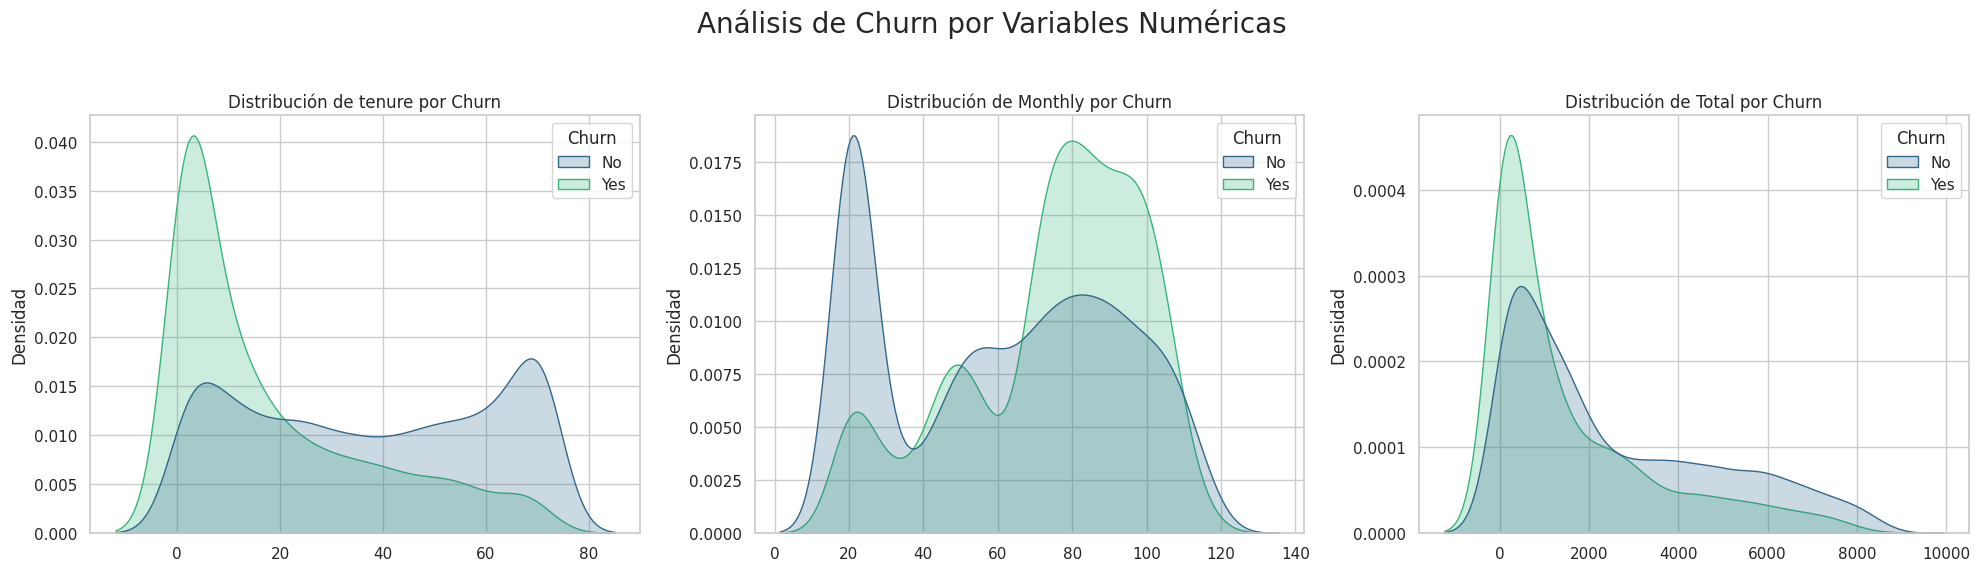

In [34]:
# --- Paso 3.4: Análisis de Churn por Variables Numéricas ---

# Lista de las columnas numéricas clave que queremos analizar
variables_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Creamos una nueva figura para los tres gráficos (1 fila, 3 columnas)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Análisis de Churn por Variables Numéricas', fontsize=20)

# Bucle para generar un gráfico de densidad (KDE) por cada variable
for i, columna in enumerate(variables_numericas):
    ax = axes[i] # Seleccionamos el subgráfico
    # Usamos kdeplot para visualizar la forma de la distribución de los datos.
    # El parámetro 'hue' crea curvas separadas para 'Yes' y 'No'.
    sns.kdeplot(data=datos_limpios, x=columna, hue='Churn', fill=True, ax=ax, palette='viridis', common_norm=False)
    ax.set_title(f'Distribución de {columna.split(".")[-1]} por Churn')
    ax.set_xlabel('')
    ax.set_ylabel('Densidad')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 🚀 Informe Final: Análisis de Evasión de Clientes (Churn) - Telecom X

**Para:** Equipo de Data Science, Telecom X  
**De:** Gonzalo Malca Garcia, Analista de Datos  
**Fecha:** 19 de agosto de 2025  
**Asunto:** Hallazgos Clave del Análisis Exploratorio sobre las Causas del Churn.

---

### **🎯 Resumen Ejecutivo**

Este informe presenta los resultados de un análisis exhaustivo sobre los factores que impulsan la **tasa de evasión (Churn) del 26.58%** en los clientes de Telecom X. A través de un proceso completo de **ETL (Extracción, Transformación y Carga)**, se preparó un dataset de alta calidad para identificar los perfiles de riesgo y las causas operativas detrás de esta alta tasa de cancelación.

El análisis revela que el Churn no es un evento aleatorio, sino un patrón concentrado en un segmento de clientes muy específico, fuertemente ligado a su **antigüedad**, el **tipo de servicio de internet** contratado y la **ausencia de servicios de valor añadido**.

---

### **⚙️ Proceso de ETL: De Datos Crudos a Insights de Calidad**

Los datos para este análisis fueron extraídos de una API en formato JSON. Se aplicó un riguroso proceso de ETL que incluyó:
*   **Normalización:** Aplanamiento de la estructura JSON anidada para crear un DataFrame tabular.
*   **Limpieza de Datos:** Corrección de tipos de datos (ej. `Charges.Total` a numérico) y eliminación de registros con datos categóricos inconsistentes en la variable `Churn`.
*   **Ingeniería de Características:** Creación de la métrica `Charges.Daily` para un análisis más granular.

El resultado es un DataFrame limpio y consistente de **7,032 clientes y 22 columnas**, listo para un análisis fiable.

---

### **🔎 Hallazgos Clave del Análisis Exploratorio (EDA)**

#### **Perfil del Cliente con Mayor Riesgo de Churn:**

El análisis de segmentación reveló un perfil muy claro para los clientes que cancelan:

| Característica              | Perfil de Alto Riesgo de Churn                                 | Insight Clave                                                              |
| :-------------------------- | :------------------------------------------------------------- | :------------------------------------------------------------------------- |
| **📅 Antigüedad (Tenure)**   | **Clientes Nuevos** (pico de Churn en los primeros meses)      | La experiencia inicial es crítica. Hay una falla en el onboarding.           |
| **🌐 Servicio de Internet** | **Fibra Óptica**                                               | El servicio más premium es, paradójicamente, el mayor generador de cancelaciones. |
| **🛡️ Servicios Adicionales**| **Sin Soporte Técnico y Sin Seguridad Online**                 | La falta de estos servicios de valor añadido es un fuerte predictor de Churn.     |
| **👥 Perfil Demográfico**    | **Personas Mayores**, **Solteros** y **Sin Dependientes**        | Estos grupos muestran una propensión a cancelar significativamente mayor.      |
| **💰 Facturación Mensual**   | **Clientes con las facturas mensuales más altas**             | Se correlaciona directamente con el alto costo de la Fibra Óptica.         |

---

### **🏁 Conclusión y Próximos Pasos**

El problema de Churn en Telecom X está claramente definido y concentrado. Basado en estos hallazgos, se pueden proponer estrategias de retención enfocadas en **mejorar la experiencia del cliente de Fibra Óptica durante los primeros meses** y en **promocionar servicios de valor añadido** como el Soporte Técnico y la Seguridad Online.

Este análisis exploratorio proporciona una base sólida y un dataset de alta calidad, listos para la siguiente fase: el **desarrollo de modelos de Machine Learning** para predecir el Churn de manera proactiva.